In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
file_path = "D:/Descargas/heart_cleveland_upload.csv"

In [6]:
try:
    data = pd.read_csv(file_path)
    print("Archivo cargado correctamente.")
except FileNotFoundError:
    print(f"Error: El archivo {file_path} no fue encontrado.")
    exit()
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

Archivo cargado correctamente.


In [8]:
print("\nPrimeras 25 filas del dataset:")
print(data.head(25))


Primeras 25 filas del dataset:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    69    1   0       160   234    1        2      131      0      0.1   
1    69    0   0       140   239    0        0      151      0      1.8   
2    66    0   0       150   226    0        0      114      0      2.6   
3    65    1   0       138   282    1        2      174      0      1.4   
4    64    1   0       110   211    0        2      144      1      1.8   
5    64    1   0       170   227    0        2      155      0      0.6   
6    63    1   0       145   233    1        2      150      0      2.3   
7    61    1   0       134   234    0        0      145      0      2.6   
8    60    0   0       150   240    0        0      171      0      0.9   
9    59    1   0       178   270    0        2      145      0      4.2   
10   59    1   0       170   288    0        2      159      0      0.2   
11   59    1   0       160   273    0        2      125      0      

In [10]:
print("\nEstadísticas descriptivas del dataset:")
print(data.describe())


Estadísticas descriptivas del dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694   

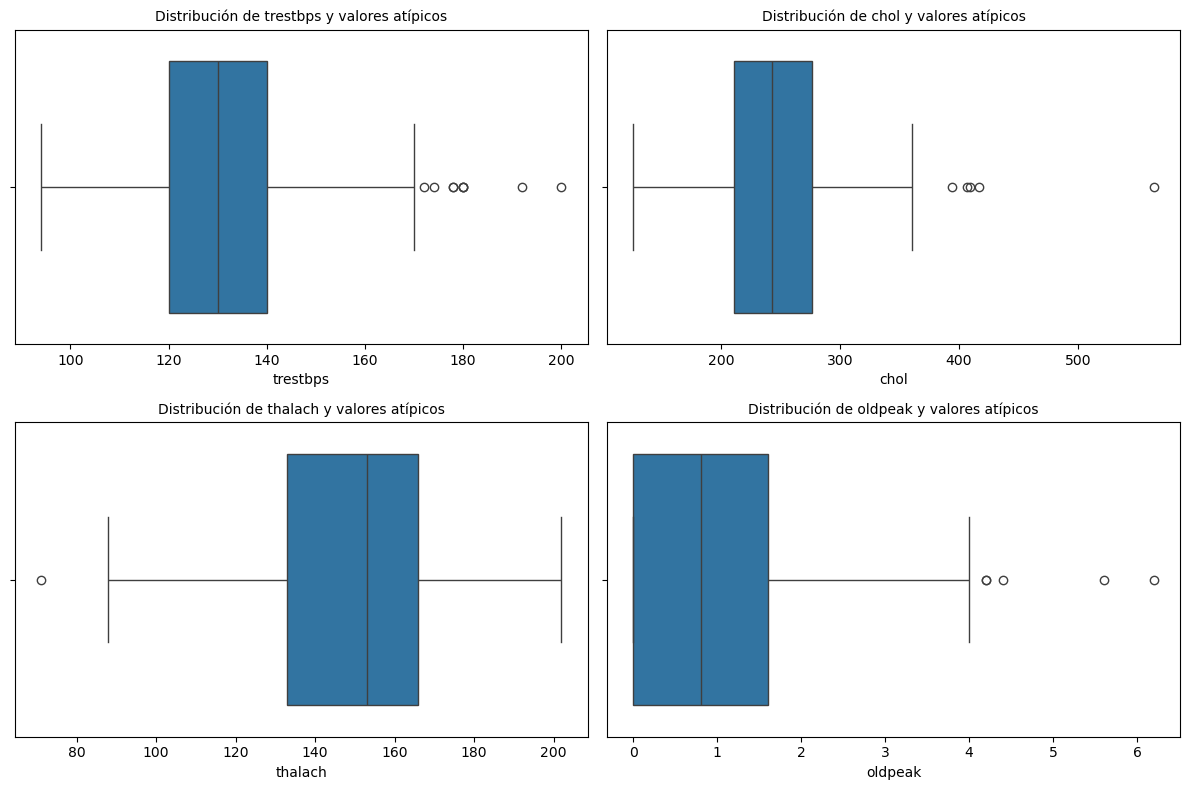

In [12]:
variables = ["trestbps", "chol", "thalach", "oldpeak"]
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[var])
    plt.title(f"Distribución de {var} y valores atípicos", fontsize=10)
plt.tight_layout()
plt.show()

In [14]:
print("\nCantidad de registros con cero en cada columna:")
for col in variables:
    print(f"Cantidad de registros con cero en {col}: {data[col].isin([0]).sum()}")


Cantidad de registros con cero en cada columna:
Cantidad de registros con cero en trestbps: 0
Cantidad de registros con cero en chol: 0
Cantidad de registros con cero en thalach: 0
Cantidad de registros con cero en oldpeak: 96


In [16]:
for col in variables:
    mean_val = data[col].mean()
    data[col] = data[col].replace(0, mean_val)
print("\nValores cero imputados con la media de cada columna.")


Valores cero imputados con la media de cada columna.


In [18]:
print("\nCantidad de registros con cero después de la imputación:")
for col in variables:
    print(f"Cantidad de registros con cero en {col}: {data[col].isin([0]).sum()}")


Cantidad de registros con cero después de la imputación:
Cantidad de registros con cero en trestbps: 0
Cantidad de registros con cero en chol: 0
Cantidad de registros con cero en thalach: 0
Cantidad de registros con cero en oldpeak: 0


In [22]:
ranges = {
    "trestbps": (90, 200),
    "chol": (100, 600),
    "thalach": (60, 220),
    "oldpeak": (0, 6)
}

In [24]:
initial_rows = len(data)
for col, (min_val, max_val) in ranges.items():
    data = data[(data[col] >= min_val) & (data[col] <= max_val)]
removed_rows = initial_rows - len(data)
print(f"\nSe eliminaron {removed_rows} filas con valores atípicos.")



Se eliminaron 1 filas con valores atípicos.


In [26]:
print("\nInformación del DataFrame después de la limpieza:")
data.info()


Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        296 non-null    int64  
 1   sex        296 non-null    int64  
 2   cp         296 non-null    int64  
 3   trestbps   296 non-null    int64  
 4   chol       296 non-null    int64  
 5   fbs        296 non-null    int64  
 6   restecg    296 non-null    int64  
 7   thalach    296 non-null    int64  
 8   exang      296 non-null    int64  
 9   oldpeak    296 non-null    float64
 10  slope      296 non-null    int64  
 11  ca         296 non-null    int64  
 12  thal       296 non-null    int64  
 13  condition  296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


In [28]:
print("\nDistribución de la variable 'condition':")
print(data["condition"].value_counts())


Distribución de la variable 'condition':
condition
0    160
1    136
Name: count, dtype: int64


In [30]:
X = data.drop("condition", axis=1)
y = data["condition"]

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=0)
print("\nConjuntos de entrenamiento y prueba creados.")


Conjuntos de entrenamiento y prueba creados.


In [36]:
modelo_regresion = LogisticRegression(solver="liblinear", random_state=0)

In [38]:
modelo_regresion.fit(X_train, y_train)
print("\nModelo de Regresión Logística entrenado.")


Modelo de Regresión Logística entrenado.


In [40]:
predicciones = modelo_regresion.predict(X_test)

In [42]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.87      0.76      0.81        34

    accuracy                           0.84        74
   macro avg       0.84      0.83      0.83        74
weighted avg       0.84      0.84      0.84        74



In [44]:
matriz_confusion = confusion_matrix(y_test, predicciones)
print("\nMatriz de Confusión:")
print(matriz_confusion)


Matriz de Confusión:
[[36  4]
 [ 8 26]]


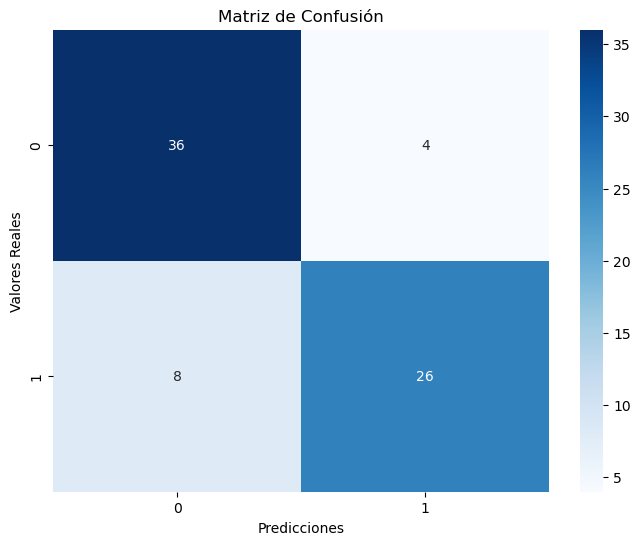

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

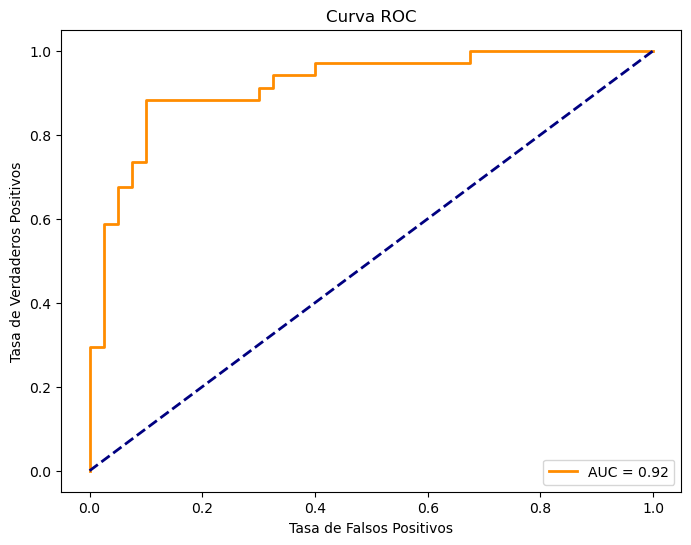

In [48]:
y_prob = modelo_regresion.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 8. Interpretación, Análisis y Documentación de Resultados
print("\n--- Interpretación y Análisis de Resultados ---")
print("\n1. Análisis Exploratorio Inicial:")
print("   - El dataset contiene información variada sobre pacientes, incluyendo datos demográficos, resultados de exámenes y características relacionadas con la salud cardíaca.")
print("   - Las estadísticas descriptivas proporcionan una visión general de la distribución y escala de cada variable.")

print("\n2. Tratamiento de Valores Atípicos y Faltantes:")
print("   - Se identificaron y trataron valores atípicos en variables clave como 'trestbps', 'chol', 'thalach' y 'oldpeak'.")
print("   - La imputación de valores faltantes y el manejo de valores atípicos aseguran la calidad de los datos y evitan sesgos en el modelo.")

print("\n3. Rendimiento del Modelo de Regresión Logística:")
print("   - El modelo de Regresión Logística fue entrenado para predecir la presencia de enfermedad cardíaca ('condition').")
print("   - El Reporte de Clasificación proporciona métricas clave como precisión, recall y F1-score para evaluar el rendimiento del modelo.")
print("   - La Matriz de Confusión visualiza el número de predicciones correctas e incorrectas para cada clase.")
print("   - La Curva ROC y el valor AUC ofrecen una medida del rendimiento del modelo en términos de la capacidad para discriminar entre las clases positiva y negativa.")

print("\n4. Métricas de Evaluación:")
print("   - **Precisión:** Indica la proporción de identificaciones positivas que fueron realmente correctas.")
print("   - **Recall:** Indica la proporción de casos positivos reales que fueron identificados correctamente por el modelo.")
print("   - **F1-score:** Proporciona una medida ponderada de la precisión y el recall.")
print("   - **AUC (Área bajo la Curva ROC):** Indica la capacidad del modelo para discriminar entre las clases positiva y negativa, con un valor más alto indicando un mejor rendimiento.")

print("\n5. Interpretación de la Matriz de Confusión:")
print("   - La Matriz de Confusión muestra el número de Verdaderos Positivos (VP), Falsos Positivos (FP), Verdaderos Negativos (VN) y Falsos Negativos (FN).")
print("   - Analizar estos valores puede revelar patrones de error específicos del modelo, como una tendencia a predecir falsos positivos o falsos negativos.")

print("\n--- Conclusiones ---")
print("\n- El modelo de Regresión Logística muestra un rendimiento razonable en la predicción de enfermedades cardíacas, según las métricas de evaluación.")
print("- El análisis exploratorio y el preprocesamiento de datos son pasos cruciales para asegurar la calidad y validez de los resultados del modelo.")
print("- Es importante considerar las limitaciones del modelo y explorar posibles mejoras, como el ajuste de hiperparámetros y el uso de modelos más complejos.")

print("\n--- Posibles Mejoras ---")
print("\n1. Ajuste de Hiperparámetros:")
print("   - Utilizar técnicas como la búsqueda de cuadrícula (Grid Search) o la búsqueda aleatoria (Randomized Search) para optimizar los hiperparámetros del modelo de Regresión Logística.")

print("\n2. Selección de Características:")
print("   - Explorar técnicas de selección de características para identificar las variables más relevantes para la predicción y simplificar el modelo.")

print("\n3. Modelos Más Complejos:")
print("   - Considerar el uso de modelos más complejos, como Máquinas de Vectores de Soporte (SVM), Árboles de Decisión o Redes Neuronales, para capturar patrones no lineales en los datos.")

print("\n4. Recolección de Datos Adicionales:")
print("   - Recolectar datos adicionales y características relevantes para mejorar la capacidad predictiva del modelo.")

print("\n5. Análisis de Errores:")
print("   - Realizar un análisis de errores para identificar patrones en los casos en los que el modelo se equivoca y entender las posibles causas.")